<a href="https://colab.research.google.com/github/cavendano01/Statistical-Learning-II/blob/main/backpropagation/SL_II_Practica_6_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# The following code is used for hiding the warnings and make this notebook clearer.
import warnings
warnings.filterwarnings('ignore')

## Usar activación ReLu en las capas intermedias

In [2]:
def relu(x):
  if x.all() >= 0.0:
    return x
  else:
    return 0.0

def relu_prime(x): #Relu derivative
  return np.where(x >= 0, 1.0, 0.0)

In [4]:
class NeuralNetwork:

    def __init__(self, net_arch):
        np.random.seed(0)
        
        self.activity = relu
        self.activity_derivative = relu_prime
        self.layers = len(net_arch)
        self.steps_per_epoch = 1
        self.arch = net_arch
        self.weights = []

        for layer in range(self.layers - 1):
            w = 2*np.random.rand(net_arch[layer] + 1, net_arch[layer+1]) - 1
            self.weights.append(w)
    
    def _forward_prop(self, x):
        y = x

        for i in range(len(self.weights)-1):
            activation = np.dot(y[i], self.weights[i])
            activity = self.activity(activation)

            
            activity = np.concatenate((np.ones(1), np.array(activity)))
            y.append(activity)

        
        activation = np.dot(y[-1], self.weights[-1])
        activity = self.activity(activation)
        y.append(activity)
        
        return y
    
    def _back_prop(self, y, target, learning_rate):
        error = target - y[-1]
        delta_vec = [error * self.activity_derivative(y[-1])]

        for i in range(self.layers-2, 0, -1):
            error = delta_vec[-1].dot(self.weights[i][1:].T)
            error = error*self.activity_derivative(y[i][1:])
            delta_vec.append(error)

        delta_vec.reverse()
        
        for i in range(len(self.weights)):
            layer = y[i].reshape(1, self.arch[i]+1)
            delta = delta_vec[i].reshape(1, self.arch[i+1])
            self.weights[i] += learning_rate*layer.T.dot(delta)
    
    def fit(self, data, labels, learning_rate=0.1, epochs=100):
        
        ones = np.ones((1, data.shape[0]))
        Z = np.concatenate((ones.T, data), axis=1)
        
        for k in range(epochs):
            if (k+1) % 10000 == 0:
                print('epochs: {}'.format(k+1))
        
            sample = np.random.randint(X.shape[0])

            x = [Z[sample]]
            y = self._forward_prop(x)

            target = labels[sample]
            self._back_prop(y, target, learning_rate)
    

    def predict_single_data(self, x):
        val = np.concatenate((np.ones(1).T, np.array(x)))
        for i in range(0, len(self.weights)):
            val = self.activity(np.dot(val, self.weights[i]))
            val = np.concatenate((np.ones(1).T, np.array(val)))
        return val[1]
    
    def predict(self, X):
        Y = np.array([]).reshape(0, self.arch[-1])
        for x in X:
            y = np.array([[self.predict_single_data(x)]])
            Y = np.vstack((Y,y))
        return Y

In [22]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


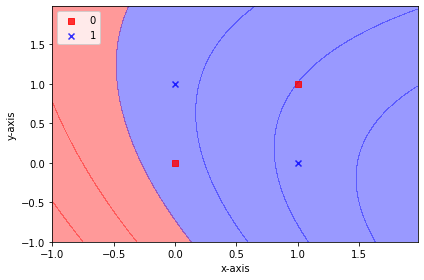

In [29]:
np.random.seed(0)
nn = NeuralNetwork([2,2,1])
nn.fit(X, y, epochs=100)
plot_decision_regions(X, y, nn)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


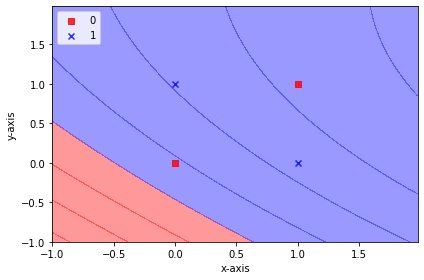

In [30]:
np.random.seed(3)
nn = NeuralNetwork([2,2,1])
nn.fit(X, y, epochs=20)
plot_decision_regions(X, y, nn)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


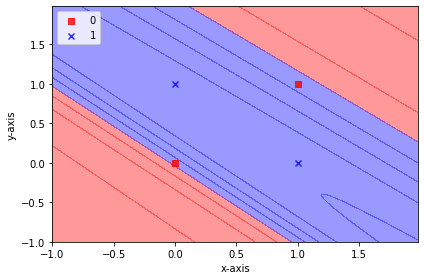

In [31]:
np.random.seed(4)
nn = NeuralNetwork([2,2,1])
nn.fit(X, y, epochs=1000)
plot_decision_regions(X, y, nn)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


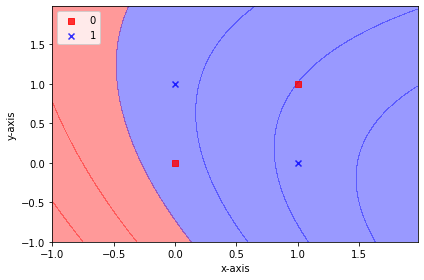

In [32]:
np.random.seed(40)
nn = NeuralNetwork([2,2,1])
nn.fit(X, y, epochs=100)
plot_decision_regions(X, y, nn)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()